In [2]:
# DogVsCat

import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm


In [12]:
train_path = os.path.expanduser('~/Documents/Python_NN/DogVsCat/dataset/train')
test_path = os.path.expanduser('~/Documents/Python_NN/DogVsCat/dataset/test')

img_size = 50
lr = 1e-3

model_name = "dogVscat_model"


In [46]:
def label_img(img):
    
    word_label = img.split('.')[-3]
    # for one hot array
    
    if word_label == 'cat':
        return [1,0]
    elif word_label == 'dog':
        return [0,1]
    
    

In [47]:
#preprocessing

def create_train_data():
    training_data = []
    for i in tqdm(os.listdir(train_path)):
        label = label_img(i)
        path = os.path.join(train_path,i)
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(img_size,img_size))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('training_data.npy',training_data)
    return training_data


In [48]:
def process_test_data():
    testing_data = []
    for i in tqdm(os.listdir(test_path)):
        path = os.path.join(test_path,i)
        img_num = i.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(img_size,img_size))
        testing_data.append([np.array(img),np.array(img_num)])
        
    shuffle(testing_data)
    np.save('testing_data.npy',testing_data)
    return testing_data


In [49]:
#train_data = create_train_data()
train_data = np.load('training_data.npy')

In [50]:
train_data.shape

(25000, 2)

In [8]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf
tf.reset_default_graph()

In [10]:
# None is for batch size , it will take automatically
convnet = input_data(shape=(None, img_size, img_size, 1), name ='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)


convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
#Dropout is a regularization technique patented by Google for reducing
#overfitting in neural networks by preventing complex co-adaptations on training data
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam',learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print("Model Loaded !!")

INFO:tensorflow:Restoring parameters from /home/bharat/Documents/Python_NN/DogVsCat/dogVscat_model
Model Loaded !!


In [62]:
train = train_data[:-500]
test = train_data[-500:]

In [63]:
#X = np.array(train[:,0]).reshape(-1, img_size, img_size, 1)
#Y = np.array(train[:,1])

In [64]:
X = np.array([i[0] for i in train]).reshape(-1, img_size, img_size, 1)
Y = [i[1] for i in train]

In [65]:
test_x = np.array([i[0] for i in test]).reshape(-1, img_size, img_size, 1)
test_y = [i[1] for i in test]

In [66]:
model.fit({'input':X}, {'targets':Y}, n_epoch=10, validation_set=({'input':test_x}, {'targets':test_y}),
         snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 3829  | total loss: 0.33543 | time: 51.647s
| Adam | epoch: 010 | loss: 0.33543 - acc: 0.8542 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.35103 | time: 52.785s
| Adam | epoch: 010 | loss: 0.35103 - acc: 0.8469 | val_loss: 0.63546 - val_acc: 0.7640 -- iter: 24500/24500
--


In [13]:
model.save(model_name)

INFO:tensorflow:/home/bharat/Documents/Python_NN/DogVsCat/dogVscat_model is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
# visually inspecting test data

In [68]:
import matplotlib.pyplot as plt

In [71]:
#test_data = process_test_data()
test_data = np.load('testing_data.npy')
test_data

array([[array([[ 55, 102, 110, ...,  81,  69,  66],
       [109,  86,  70, ...,  67,  61,  55],
       [104, 115,  46, ...,  79,  56,  53],
       ...,
       [ 45,  34,  22, ...,  48,  38, 119],
       [ 30,  18,  58, ..., 102, 123,  94],
       [ 19,  44,  42, ..., 118,  88,  88]], dtype=uint8),
        array('3858', dtype='<U4')],
       [array([[199, 191, 190, ..., 141, 137, 135],
       [202, 192, 191, ..., 140, 135, 138],
       [198, 179, 193, ..., 148, 139, 139],
       ...,
       [120, 114, 108, ...,  54,  52,  48],
       [108, 115, 107, ...,  63,  56,  58],
       [111, 103, 102, ...,  59,  56,  53]], dtype=uint8),
        array('12458', dtype='<U5')],
       [array([[173, 179, 186, ...,  17,  30,  64],
       [175, 183, 187, ...,  16,  24,  71],
       [176, 183, 185, ...,  15,  31,  77],
       ...,
       [ 89,  98,  73, ...,   6,  11,  28],
       [ 54, 103,  96, ...,   8,  12,  23],
       [ 56,  80, 111, ...,   6,  11,  33]], dtype=uint8),
        array('4951', dtype=

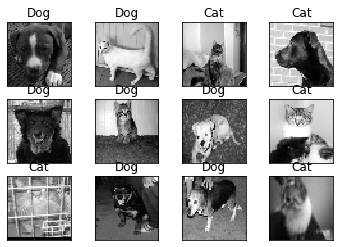

In [75]:
fig = plt.figure()
# cat --> [1,0]
# dog --> [0,1]
for num,data in enumerate(test_data[:12]):
    
    img_data = data[0]
    img_num = data[1]
    
    y = fig.add_subplot(3,4,num+1)
    orignal = img_data
    data = img_data.reshape(img_size,img_size,1)
    
    model_output = model.predict([data])[0]
    
    if np.argmax(model_output) == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'
        
    y.imshow(orignal, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()